# Executive Summary

The central motivation for this project is to predict age-related outcomes using attributes from data for women’s yearly doctor visits. Using data from the The Study of Women’s Health Across the Nation (SWAN) Biospecimen Repository, longitudinal data is used to evaluate health related measures and their predictive power. The data is cleaned and processed for use before using lasso regression (a modified linear regression which aims to minimize coefficients) to implement feature reduction. Certain features and symptoms were identified as positively correlated indicators and negatively correlated with age as the target prediction. Future directions should include wide age ranges to further predict age from clinical measures.


# Introduction

It’s necessary to improve health and wellness by preventing ailments and identifying risk factors. Moreover, We plan to apply longitudinal data analysis to evaluate risk factors, predict clinical outcomes, and simulate measures for a given population. The analysis of longitudinal data consists of repeated measures collected over time and use correlational analysis to understand the change.

The central motivation of this project is to predict strong indicators of co-morbid diseases using attributes from data for middle aged women’s yearly doctor visits. We aim to use lasso regression to determine the most useful attributes provided in predicting age. Predicting age from diseases provides additional evidence for screenings of certain symptoms and will allow clinicians to make more strategic assessments for patients. There are also many illnesses and symptoms that are not reported frequently in which case they will have later detection and diagnoses. Symptoms that covary with age will more represents indicators for health outcomes and potentially improve wellness for socially and developmentally sensitive populations.


# Data Description

We used the study of Women’s Health Across the Nation (SWAN) Biospecimen Repository as our main source for analysis. This data source provides a dataset of fourteen clinical visits for nearly 3,000 women in the U.S. Each participant is characterized by demographic information including age, race/ethnicity, and other information. Biological, clinical, and psychological measures are also recorded for each participant during each visit. There are over 700 measures that are collected for each of the 14 clinical visits. To interrogate the data, we loaded the data of one clinical visit into a pandas dataframe. 

Since the dataset has over 700 measures collected at each clinical visit for every woman, data cleaning and organizing is needed to reduce the dimensionality of these features. Measures recorded range considerably, and some additional processing is needed to choose how features should be grouped. For example, biological measures collected during visits include measures regarding nutrition, metabolism, sleep hygiene, menstrual activity, and more. Psychosocial measures are collected regarding levels of energy, income and discrimination experiences, sexual behaviors, and more. However, the measures are not parsed in their current format, and additional steps should be taken to group column features thematically. Some measures may also need to be grouped based on null values. For example, in the dataframe below, many cells have missing data that should be dropped from further processing.

For our data processing, we needed to read in each of the files separately. Each is stored as a TSV file, named similarly except for the visit number at the end of the file name. So looping through the values of our visits using the function to read CSV files from the pandas package, with a separator of \t rather than commas, we easily read our data into data frames. From here, we needed to add a column which stores the visit number, so for each row of the same patient id, we can distinguish from which visit this data was taken.

When it came time to merge our datasets, we had to face our first problem in cleaning- inconsistent column names. The attributes in each data set have a specific name, followed by the number of the visit. For example, the CANCERS attribute, which asks if some health care provider had either told a patient that they had, or had treated them for cancer (other than skin cancer), is stored as CANCERS1 in the first visit data, but as CANCERS2 in our visit 2 data set, and so on. This meant that when merging our data frames, column names wouldn’t match, and so new columns would be added for each visit information. This quickly grew our data from and already massive 700 columns to over 8000 columns. To get around this, we removed the final number from each attribute name within each separate visit’s dataset, before we combined them. With this solution, our data was reduced to just over 1700 columns. This is still an issue for us, as it means some columns must still not line up, and it is something we are still actively working on.
We then started looking at columns that aren’t relevant to anything we’re interested in looking at. For example, there were over 10 columns per data set asking about the ages of people who live with a given patient. This information has essentially no use in our project, and is just further cluttering our data, so we decided to remove every column of this type, other than that of the actual patient's age. As we continue to find patterns in repetitive and unimportant columns, we will continue to reduce our attributes.

Finally, in cleaning our data, we wanted to try to remove null values. Some columns in our data are entirely null, and some contain very few actually responses and are mostly, though not entirely, null as well. We decided that the best strategy to start with would be to remove any column in which over 75% of all column entries are NaN. Columns with such little actual information may be unreliable, or may simply have no weight in our analysis since there are so few cases. Thus, we decided so focus on the columns which more reliably can give us real information to build off of. After completing all of these cleaning methods, our merged table has shrunk from 8000 columns to 800. As we implement our machine learning methods, we hope to distinguish more useful and not useful attributes that can further help us narrow down our columns.


# Exploratory Visualizations

For our visualizations, we built descriptive histograms for chosen features in order to better understand the distribution of physiological categories and other features of the data. Background research indicates that women with psychiatric conditions and emotion dysregulation may also have cardiovascular identifiers such as high blood pressure. We chose to plot histograms for questions features related to emotion regulation, diagnosis of high blood pressure, and feelings of mood for a given visit.

We chose to render histograms due to their simplicity as well as to determine the spread of certain categorical features. These visualizations have helped us to understand the nature of the measures asked for each participant at the visit. Moreover, we chose to visualize the retention of participants over the course of the study to better interpret the participation trends of the study.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from collections import Counter

In [2]:
plt.style.use('seaborn')

<AxesSubplot:title={'center':'Women with High Blood Pressure'}, xlabel='Status', ylabel='Count'>

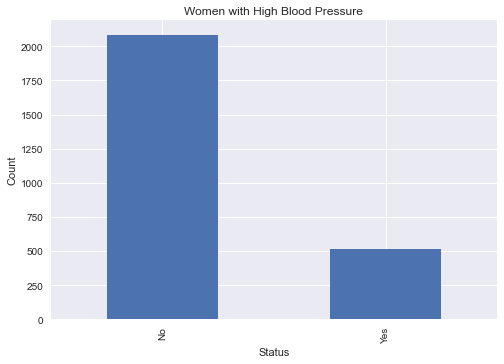

In [3]:
# read in the data for one visit
visit1_df = pd.read_spss('0001-Data.sav')

# high blood pressure
# yes/no question of whether this person has been diagnosed with high bp
visit1_df['HIGHBP5'].value_counts().plot(kind='bar', style='seaborn', title='Women with High Blood Pressure', ylabel='Count', xlabel='Status')

<AxesSubplot:title={'center':'Felt Happy'}, xlabel='Rating of Feeling', ylabel='Count'>

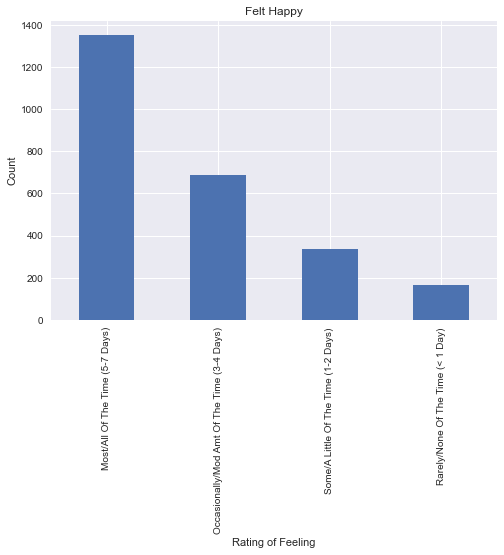

In [4]:
# felt happy
# this is a qualitative question asked on a likert scale about how happy the participant felt over the last week
visit1_df['HAPPY5'].value_counts().plot(kind='bar', style='seaborn', title='Felt Happy', ylabel='Count', xlabel='Rating of Feeling')

<AxesSubplot:title={'center':'Felt Supported'}, xlabel='Rating of Feeling', ylabel='Count'>

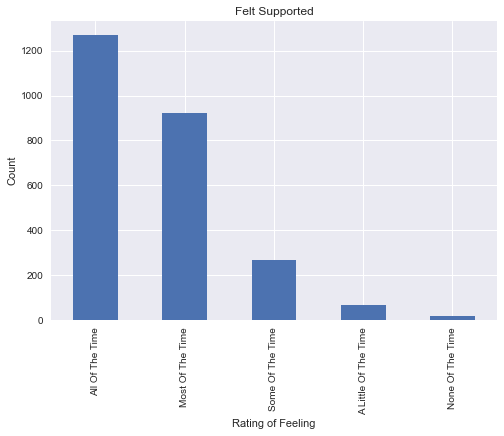

In [5]:
# asks participants if how much they felt supported and listened to
visit1_df['LISTEN5'].value_counts().plot(kind='bar', style='seaborn', title='Felt Supported',ylabel='Count', xlabel='Rating of Feeling')

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

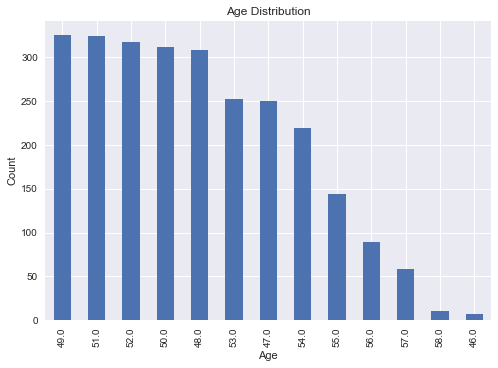

In [6]:
# in order to better understand the variability in age of participants
# visits are conducted every two years so at this particular visit, participants are about ten years into the study potentially
visit1_df['AGE5'].value_counts().plot(kind='bar', style='seaborn', title='Age Distribution', ylabel='Count', xlabel='Age')

<AxesSubplot:title={'center':'Felt Lonely'}, xlabel='Rating of Feeling', ylabel='Count'>

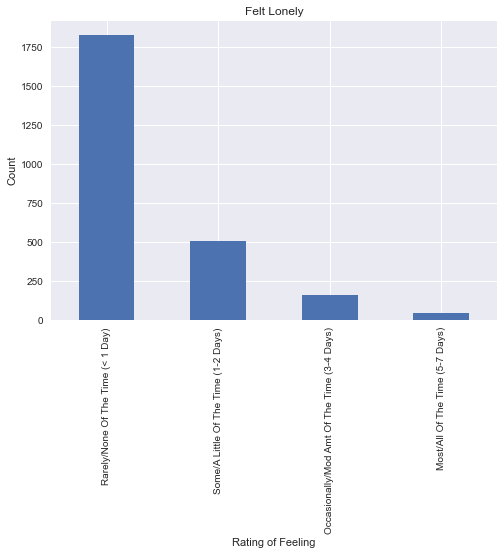

In [7]:

# asks participants about feelings of loneliness in a given time period
visit1_df['LONELY5'].value_counts().plot(kind='bar', style='seaborn', title='Felt Lonely', ylabel='Count', xlabel='Rating of Feeling')

In [26]:
fig = px.scatter(y=swanid_counts, x=[int(x) for x in range(10)],labels=dict(x="Visit Number", y="Total Participants"))
# title alignment
fig.update_layout(title_text='Drop-Out Rate of SWAN Study', title_x=0.5)
fig.write_html("drop-out-rate-scatterplot.html")

While the original goal of our project was to predict diseases from clinical measures, we decided to pivot to a problem more suited to the dataset. Considering the many measures, it became clear that we needed to implement an algorithm that optimized feature reduction. As a continuous value, we believe was an appropriate choice for a target predictor, and we aimed to implement a regression model to evaluate predictive power.

## Data Preparation Methods
### Merging our Data

As our data was split between 10 different TSV (Tab Separated Values) files, we needed to reach in each file separately and combine them all into one large dataframe to be used further in our code. As each was stored under a filename of the same format, differing only by the visit number at the end of the name, we were able to use a loop to read each file. However, this visit number was also included at the end of each column name, causing columns with the same information type to be incompatibe for combining, which caused our data table to soar from over 700 to almost 8000 columns. To resolve this, we removed  the visit number from each attribute name before adding each visit's data to our main dataframe.

In [8]:
import pandas as pd
import numpy as np

data = pd.DataFrame()

# reading in each of our ten files
for i in range(1, 11):
    filename = f"0001-Data-{i}.tsv"
    
    # reading visit file into a dataframe
    with open(filename, "r") as infile:
        visit_data = pd.read_csv(infile, sep = "\t")
        
        # removing the visit number from the end of each attribute name
        for col in visit_data.columns:
            if col[-len(str(i)):] == str(i):
                visit_data.rename(columns = {col:col[:-len(str(i))]}, inplace=True)
        
        # adding this visit data back to the merged dataframe
        data = pd.concat([data, visit_data], ignore_index = True)

/Users/victoriamccray/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/victoriamccray/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (3,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,51,52,53,54,57,58,59,60,61,63,64,65,66,67,68,69,70,71,72,73,74,75,85,87,88,90,91,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,477,478,482,483,484,485,486,490,491,495,504,506,507,515,522,530,536,537,538,539,577) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Users/victoriamccray/opt/anaconda3/lib/python3.8/site-packages/IPython/core/

In [9]:
null_cap = 3000

### Further Data Cleaning

Before removing missing values from our data, it was crucial that we standardized how missing values were treated. Our dataset used empty cells, NaN values, and the number -1 to denote missing data. After converting all of these values to the standard numpy NaN value, we could start to remove columns which had more nulls present than our decided null cap, discussed above. The remaining steps necessary to clean our data included removing repetitive age columns as well as non-numeric columns, and then converting the remaining columns to numeric types, as they had previously been stored as strings. Then, we could finally remove all remaining rows which contained null values so that our data set could be used in with Lasso Regression.

In [10]:
# replacing blank cells with NaN
data.replace(r'^\s*$', np.nan, regex=True, inplace = True)
data.replace("-1", np.nan, inplace = True)

for col in data.columns:
    # removing columns about family age
    if "AGE" in col and col != "AGE":
        del data[col]

    # removing columns with > null cap NaN values
    if col in data:
        nas = data[col].isna().sum()
        if nas > null_cap:
            del data[col]

In [11]:
# previewing dataframe
data.head()

,SWANID,VISIT,INTDAY,AGE,LANGINT,RACE,ANTICO1,HEART1,CHOLST1,BP1,...,HEIGHT,HTMETHO,WEIGHT,SCALE,WAIST,HIP,BMI,SPSCTIM,HPSCTIM,STATUS
0,10046,1,413,53,1,2,1,1,1,1,...,155.4,1,74,1,98,106.6,30.642887785745,0:10:08,0:09:52,7
1,10056,1,357,52,1,4,1,1,1,1,...,161.3,1,53.2,3,63.5,95.3,20.447626211243,0:12:55,0:13:03,4
2,10092,1,364,46,1,4,1,1,1,1,...,166.1,1,85.6,1,95.4,112.9,31.026622364323,0:18:01,0:17:39,4
3,10126,1,442,50,1,1,1,1,1,1,...,161.5,1,78.4,1,89.5,110.5,30.058756433973,.,.,4
4,10153,1,374,52,1,3,1,1,1,1,...,149.5,1,68,3,96,99.5,30.424715607208,0:10:47,0:10:40,4


In [12]:
# remove categorical columns
non_num = ["READSPE", "THNKSPE", "LANGSPE", "SPEKSPE", "PROGSPE", 
           "SPORT1", "STPTIM1", "SPORT2", "LANGFFQ", "SPSCTIM", 
           "HPSCTIM", "STRTIM1", "STRTIM2", "STRTIM3", "STPTIM2", "STPTIM3", "BLDDRAW"]
for col in non_num:
    if col in data.columns:
        del data[col]  

# convert numbers stored as strings to numbers
data = data.apply(pd.to_numeric)

In [13]:
# dropping rows with nulls as lasso cannot use them
data.dropna(axis = 0, how = "any", inplace=True)

In [14]:
df = data
# grab participant num and visit num columns
visit_count = df[['SWANID', 'VISIT']]
visit_count

visit_count = df.groupby(by=['VISIT'], dropna=False).count()
swanid_counts = visit_count['SWANID']
swanid_counts

VISIT
1     1519
2     2508
3     2469
4     2359
5     2206
6     2042
7     2029
8     1379
9     1843
10    1906
Name: SWANID, dtype: int64

### Adjusting Dataframe for Machine Learning

At this point, we can begin implementing our machine learning algorithm. To prepare, we removed the age column from the dataframe from which we will train our data, so that age cannot be used as a predictive attribute for itself. In addition, we dropped the column containing the visit number, column "VISIT", and "INTDAY", the day which the visit was conducted on, as these are not real attributes of the patient, but rather attributes of the study. Thus, these cannot be generalized to predicting age amongst the general population of women, which is our end goal.

In addition, we made sure to scale our data columns to standardize their variance, in order to prevent inherently uneven contribution for individual attributes.

In [16]:
import numpy as np

# store age and ids in separate dataframe
y = pd.DataFrame({"AGE": data["AGE"], "SWANID": data["SWANID"], "VISIT": data["VISIT"]})

x = data

# remove predicted feature, as well as visit number and intday
drops = ["AGE", "VISIT", "INTDAY"]
for drop in drops:
    x = x.drop([drop], axis=1)

# select only numeric columns to use for lasso
x = x.select_dtypes(include = np.number)

In [17]:
# creating outputs will have same std dev by dividing each feature by the std dev
x_scaled = pd.DataFrame()
for feat in list(x.columns):
    x_scaled[feat] = x[feat] / x[feat].std()
x_scaled

,SWANID,LANGINT,RACE,ANTICO1,HEART1,CHOLST1,BP1,DIURET1,THYROI1,INSULN1,...,SYSBP2,DIABP2,HEIGHT,HTMETHO,WEIGHT,SCALE,WAIST,HIP,BMI,STATUS
1,0.389922,1.438078,2.970946,6.930103,5.311085,3.327061,2.400966,4.122357,3.360703,4.321649,...,5.523980,5.980388,24.476535,3.452267,2.596303,3.442927,3.873504,6.360891,2.812726,2.470587
2,0.391317,1.438078,2.970946,6.930103,5.311085,3.327061,2.400966,4.122357,3.360703,4.321649,...,5.884240,5.980388,25.204913,3.452267,4.177510,1.147642,5.819406,7.535620,4.267947,2.470587
4,0.393683,1.438078,2.228209,6.930103,5.311085,3.327061,2.400966,4.122357,3.360703,4.321649,...,8.886403,9.369274,22.685939,3.452267,3.318583,3.442927,5.856006,6.641224,4.185150,2.470587
7,0.402717,1.438078,2.970946,6.930103,5.311085,6.654122,2.400966,4.122357,3.360703,4.321649,...,6.124413,6.578427,23.285333,3.452267,4.670417,1.147642,6.466007,8.643603,5.590655,4.941173
8,0.405742,1.438078,1.485473,6.930103,5.311085,3.327061,2.400966,4.122357,3.360703,4.321649,...,6.604759,7.575158,25.053167,3.452267,2.976964,1.147642,4.306605,6.414288,3.078366,2.470587
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25482,3.869941,1.438078,0.742736,6.930103,5.311085,6.654122,4.801933,8.244713,3.360703,4.321649,...,6.004326,7.973850,24.218568,6.904534,3.943257,3.442927,6.252507,7.909398,4.363451,0.617647
25483,3.870096,1.438078,2.970946,6.930103,5.311085,3.327061,2.400966,4.122357,3.360703,4.321649,...,7.085105,7.973850,24.339964,3.452267,3.977419,2.295284,5.514406,7.795930,4.357460,2.470587
25484,3.873159,1.438078,2.228209,6.930103,5.311085,3.327061,2.400966,4.122357,3.360703,4.321649,...,7.205192,7.973850,24.097171,3.452267,3.279541,3.442927,5.544906,7.121795,3.665665,1.235293
25485,3.873547,1.438078,2.970946,6.930103,5.311085,3.327061,4.801933,4.122357,3.360703,4.321649,...,8.646230,7.973850,25.113865,6.904534,6.417554,3.442927,8.509509,9.878404,6.604110,0.617647


## Machine Learning 
### Lasso Regression

As previously mentioned, our main goals for this project were to determine what the most useful attributes were in our data for predicting a woman's age. Simultaneously, this allows us to draw conclusions on what attributes are common amongst older women versus amongst younger women, as the usefulness of a feature in determining age implies that it may somehow be _linked_ to age.

To understand lasso regression, we must first discuss linear regression. Linear regression is a statistical predictive model which assumes and defines a relationship between various numeric inputs and some continuous numerical variable being examined. It can be used to create an equation which assigns a coefficient to each variable considered, which then sum together to the model's prediction for the target variable. These coefficients are based off of data that is provided for the model to learn from and adjust its coefficients to, in order to get the most accurate predictions for the target variable that it can. The issue in our case lies in the fact that generally, linear regression will assume that every variable should be used in determining this relationship, and as we have so many variables, this would likely lead to overfitting that would results in worse or strange predictions. This would also lead to the inability to use this model reasonably within the general population, as it would be difficult to gather all 700 pieces of information from a women in order to predict her age. We are looking for 15-25 attributes that could be collected and used to predict age as we would like to.

Lasso regression is a modified version of linear regression which places an emphasis on shrinkage. Effectively, lasso places a limit on the sum of every coefficient, meaning that it is forced to minimize coefficients wherever possible. This is perfect for our problem, as by enforcing this upper limit, lasso will need to establish some coefficients as zero. This means that the attributes with coefficients of 0 have been determined by our lasso model to have such minimal use in predicting that the attribute's effect can be removed completely and predictions can still be made. So, by examining those attributes which lasso determines to have non-zero coefficients, we can deduce that these are the useful attributes that we are looking for.

Lasso regression also makes use of an alpha parameter which determines the amount of priority that decreasing the nuber of features takes over a high squared correlation coefficient, r^2, which measures to what extent the variance of the predicted value is explained by the variance in our input data. Very low alpha values highly favor a better r^2, while a higher value of alpha will result in greater feature reduction. For this project we tested a range of alphas to determine a fitting alpha which would result in a model with both accurate predictions and adequate feature reduction.

For further reading on Lasso and how it works, look [here.](https://machinelearningmastery.com/lasso-regression-with-python/)

In [18]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets since we are testing and training on the same data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# using premade pipelines to search for the best alpha value
pipeline = Pipeline([("scaler",StandardScaler()),
    ("model", Lasso())])

search = GridSearchCV(pipeline, {"model__alpha": np.arange(0.1 , 3 , .1)},
                     cv = 5, scoring = "neg_mean_squared_error", verbose = True)

# fitting search pipeline to our data and finding the best alpha value
search.fit(x_train, y_train)
best_alpha = search.best_params_["model__alpha"]
best_alpha

Fitting 5 folds for each of 29 candidates, totalling 145 fits


0.1

** Our determined best value for alpha is 0.1.

In [20]:
from sklearn.metrics import r2_score

# initializing lasso with our predetermined best alpha
lasso = Lasso(alpha = best_alpha)

# fit lasso to data
lasso = lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print("r^2 on test data : %f" % r2_score_lasso)

r^2 on test data : 0.863354


### Finding the Most Negative and Positive Coefficients

After using Lasso to determine prediction coefficients for each of our attributes, we attatched each coefficient to its respective attribute and created a function to sort this list to be able to return the highest or lowest valued pairings.

In [27]:
# defining our list of lasso coefficients
coefs = list(zip(lasso.coef_[0], x))

In [28]:
def top_tuples(tup_list, n = 10, highest = True):
    """ returns a list the top n tuples with the highest first value
    parameters:
        tup_list: a list of tuples
        n: an integer, number of tuples to return
        descending: boolean if you want top n lowest or highest tuples
    """
    sort_list = sorted(tup_list, key=lambda x: x[0], reverse = highest)
    return sort_list[:n]

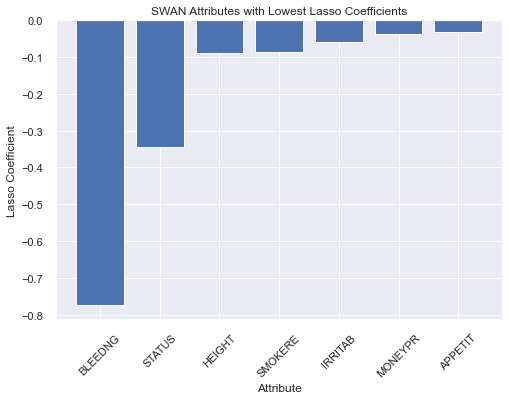

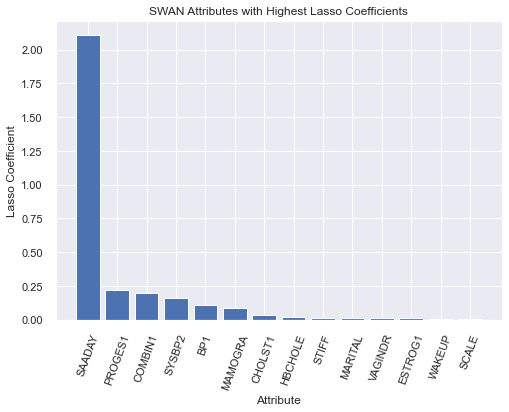

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# finding and plotting the lowest coefficients and attributes
low_coefs = top_tuples(coefs, 20, highest = False)

plt.bar([col for val, col in low_coefs if val != 0.0], [val for val, col in low_coefs if val != 0.0])
plt.xticks(rotation = 45)
plt.xlabel("Attribute")
plt.ylabel("Lasso Coefficient")
plt.title("SWAN Attributes with Lowest Lasso Coefficients")
plt.show()

# storing results in a dataframe for immediate access to exact coefficients
low_df = pd.DataFrame()
low_df["Feature"] = [col for val, col in low_coefs if val != 0.0]
low_df["Coefficient"] = [val for val, col in low_coefs if val != 0.0]

# finding and plotting the lowest coefficients and attributes
high_coefs = top_tuples(coefs, 20, highest = True)
plt.bar([col for val, col in high_coefs if val != 0.0], [val for val, col in high_coefs if val != 0.0])
plt.xticks(rotation = 70)
plt.xlabel("Attribute")
plt.ylabel("Lasso Coefficient")
plt.title("SWAN Attributes with Highest Lasso Coefficients")
plt.show()

# storing results in a dataframe for immediate access to exact coefficients
high_df = pd.DataFrame()
high_df["Feature"] = [col for val, col in high_coefs if val != 0.0]
high_df["Coefficient"] = [val for val, col in high_coefs if val != 0.0]

### Examining the Coefficients

##### Most Negative Coefficients
|Feature | Meaning | Coefficient | 
|-|-|-|
| BLEEDNG  |Menstrual bleeding since last visit|  -0.773982|
|   STATUS    |menstrual status|-0.344744 |
|   HEIGHT  |height|  -0.087811|
|  SMOKERE   |Smoked regularly since last visit| -0.084733|
|  IRRITAB    |Irritability past 2 wks|-0.058973|
|  MONEYPR   |Money problems upsetting since last visit| -0.038102|
|  APPETIT  |Lost appetite past week|  -0.031346|

Interpretation:

##### Most Positive Coefficients
|Feature | Meaning | Coefficient | 
|-|-|-|
|SAADAY   |chose to self-administer questions|  2.110777|
|   PROGES1  |progesterone medication|   0.221683|
|  COMBIN1  |combined estrogen and progesterone medication|   0.195969|
|  SYSBP2  |systolic blood pressure|   0.161439|
|    BP1  |blood pressure medication|   0.105005|
|MAMOGRA  |Mammogram since last visit|   0.088967|
 |  CHOLST1  |medication for cholesterol|   0.034195|
  | HBCHOLE  |High cholesterol since last visit|   0.017653|
   |  STIFF  |Stiffness/soreness past 2 wks|   0.013482|
|   MARITAL  |Marital status|   0.010298|
 | VAGINDR  |Vaginal dryness past 2 wks|   0.009176|
  |ESTROG1  |estrogen medication|   0.008495|
   |WAKEUP  |Wake up several times/night past 2 wks|   0.007270|
    |SCALE  |Weight scale type|   0.001348|
    
Interpretation:

In [30]:
# explore column reduction
print("Number of Columns:", len(x.columns), "to", 
          len([val for val, col in coefs if val != 0.0]), "after Lasso.")

Number of Columns: 128 to 21 after Lasso.


In [31]:
# explore unused columns
print([col for val, col in coefs if val == 0.0])

['SWANID', 'LANGINT', 'RACE', 'ANTICO1', 'HEART1', 'DIURET1', 'THYROI1', 'INSULN1', 'NERVS1', 'STEROI1', 'FERTIL1', 'BCP1', 'ESTRNJ1', 'OTHMED1', 'PAIN1', 'SLEEP1', 'OTC1', 'ANEMIA', 'DIABETE', 'HIGHBP', 'MIGRAIN', 'STROKE', 'OSTEOAR', 'THYROID', 'HEARTAT', 'ANGINA', 'OSTEOPR', 'CANCERS', 'BROKEBO', 'DANDC', 'HYSTERE', 'OOPHORE', 'UTERPRO', 'THYRREM', 'PRGNANT', 'QLTYLIF', 'BOTHER', 'BLUES', 'GOOD', 'KEEPMIN', 'DEPRESS', 'EFFORT', 'HOPEFUL', 'FAILURE', 'FEARFUL', 'RESTLES', 'HAPPY', 'TALKLES', 'LONELY', 'UNFRNDL', 'ENJOY', 'CRYING', 'SAD', 'DISLIKE', 'GETGOIN', 'CONTROL', 'ABILITY', 'YOURWAY', 'PILING', 'LANGSAA', 'OVERHLT', 'HOSPSTA', 'MDTALK', 'PAPSMEA', 'BRSTEXA', 'HLTHSER', 'ACHES', 'COLDSWE', 'NITESWE', 'FEELBLU', 'DIZZY', 'NRVOUS', 'FORGET', 'MOODCHG', 'HARTRAC', 'FEARFULA', 'HDACHE', 'HOTFLAS', 'TRBLSLE', 'WAKEARL', 'STARTNE', 'WORKTRB', 'QUITJOB', 'WORKLOA', 'PRTUNEM', 'WORSREL', 'RELATEN', 'SERIPRO', 'CHILDMO', 'RESPCAR', 'LEGALPR', 'CLOSDIE', 'SELFVIO', 'FAMLVIO', 'PHYSILL', 


### Finding the Best Null Capacity Per Column

Lasso regression is incapable with working with NaN values, but these are very common within our dataset. Some columns actually have entirely or almost entirely missing data. However, as there is so much variance in typical values amongst columns and so many NaN values to replace, we decided it was not responsible to replace NaN values with a filler number like 0, as this would certainly not be representative. Thus, one of the first ways we've narrowed down our column list is by removing any columns with more than a certain number of NaN values. Below is a short discussion on how we decided on our null capacity per column.

|Null Cap|# of Columns|# of Rows|r^2 Value|
|---|---|---|---|
|8000|179|5708|.79|*
|5000|150|12225|.851|
|3000|128|20260|.863|
|2000|118|20623|.861|
|1000|87|23270|.864|*

> This investigation of the most appropriate null capacity was conducted upon completion of the basic code.

A null capacity of 3000 in a column seems to be the most reasonable for our model, meaning we only keep columns which contain 3000 NaN values or less. This values seems fitting as it keeps only columns that have sufficient data to be a meaningful predictor for women in general, ie the statistic applies to/was measured on most participants, and is more suitable to be used as a predictor among the general female population. Plus, less rows are removed as less rows will contain null values, so the regressor has more patient data to learn from, and there is still alarge amount of numeric attributess being considered. Though the r-squared value is not the highest with this null capacity, the differences are so small that we are still comfortable with the predictive power of this model.

While 5000 also seems like a logical choice, as it looks at more attributes and has a slightly higher r^2 value, it should be noted that after removing rows with null values, we lose almost 2/3 of our patient data. Basing our predictor off of such a small portion of our data means training on significantly less people, and theoretically losing very important information that could be contained among lost patients' data.

# Discussion

We used public longitudinal data to predict health related outcomes such as age and its clinical correlations. We were able to parse a variety of health measures into the most salient indicators for age. Measures related to the frequency of menstrual cycles, smoking habits, irritability, financial stress and appetite were found to predict lower ages. Moreover, measures such as body aches, marital status, quality of sleep, and blood pressure management were found to predict higher ages. Many of these measures are commonly associated with aging. For example, menopause would be expected to be an indicator for age due to the fact that this occurs in women between age 40-60, and this period marks the ending of reproductive fertility. However, there are also other measures associated with aging such as an increase in aches and difficulty sleeping that were shown from the model as well. Many of these health indicators are widely researched to change with age, so our project is consistent with previous studies using the same dataset (Solomon et al 2021). 

 Feature reduction was implemented using Lasso Regression and evaluated using R-squared to ensure age was predicted effectively by the model. Additional algorithms should be tested. For example, we may have chosen to group ages in ten year spans and instead of a regressor use a random forest classifier. These models can be compared on performance as well as feature selection in order to better characterize the data.

The dataset may be susceptible to many biases in collection. The data was collected in the US between 1996 and 2008, however, we did not have available information regarding where the data was collected specifically and in what cities. This could cause variation in the measures. Additionally, the retention plot of the study shows that many women discontinued the study due to unknown reasons. Because it is unknown whether these participants differed substantially in their measures, we cannot generalize all of our findings. While we were not able to explore related effects of race or ethnicity, improvements to our project should more closely explore these features. Lastly, future explorations of the model should further explore the discarded features and features that were predictors of lower age. Specifically, it may be important to understand features such as financial stress and the relationship with age more closely.

This project may have applications for preventative healthcare. Developmentally, the women of the study experience more symptoms related to menopause, somatic aches, and difficulty sleeping at older ages. This may be critical for preparing women for sensitive changes such as menopause. Future work may also use the features to predict illness or symptoms based on given risk factors. 



# References

Solomon, D. H., Santacroce, L., Colvin, A., Lian, Y., Ruppert, K., & Yoshida, K. (2021). The relationship between 19‐year trends in medication use and changes in physical function among women in the mid‐life: A Study of Women's Health Across the Nation pharmacoepidemiology study. Pharmacoepidemiology and Drug Safety.